# Introduction. I want to use GAN to segment salt from sediments and rock. the data is from Kaggle TGS salt data. Dataset resouce is https://www.kaggle.com/c/tgs-salt-identification-challenge/data.

## Section 1 input data

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [67]:
#import modules
import sys, os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualize satellite images
import seaborn as sns
from skimage.io import imshow # visualize satellite images


from keras.preprocessing.image import load_img, img_to_array
from keras import Model
from keras.models import Sequential # type of model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Dropout, BatchNormalization # components of network
from keras.optimizers import SGD, Adam


from sklearn.model_selection import train_test_split

from tqdm import tqdm_notebook

## Load training and testing CSV data set and image data set to generate dataframe

In [33]:
train_df = pd.read_csv("train.csv", index_col="id", usecols=[0])
depths_df = pd.read_csv("depths.csv", index_col='id')
train_df = train_df.join(depths_df)
test_df = depths_df[~depths_df.index.isin(train_df.index)]

In [38]:
train_df.head()

,z
id,
2c45b152f1,312
3cb59a4fdc,603
e185ab5dc1,687
c78c89577c,236
6306dd3a8e,805


In [50]:
train_df.shape

(4000, 1)

In [52]:
test_df.shape

(18000, 1)

In [65]:
# Load the images and masks into the DataFrame and divide the pixel values by 255
for idx in train_df.index:
    image_arr =  np.array(load_img("train/images/000e218f21.png", color_mode = "grayscale"))
    image_arr = image_arr.flatten()
    train_df["images"] = image_arr

ValueError: Length of values does not match length of index

In [68]:
# Read images and masks
# Load the images and masks into the DataFrame and divide the pixel values by 255
image = load_img("train/images/000e218f21.png", color_mode = "grayscale", target_size=(28,28))
input_arr = img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.






In [73]:
train_df["images"] = [np.array(load_img("../input/train/images/{}.png".format(idx), color_mode = "grayscale")) / 255 for idx in tqdm_notebook(train_df.index)]

<ipython-input-73-3a3e22af2eb0>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  train_df["images"] = [np.array(load_img("../input/train/images/{}.png".format(idx), color_mode = "grayscale")) / 255 for idx in tqdm_notebook(train_df.index)]


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [64]:
aa.flatten()

array([131, 131, 131, ..., 138, 139, 139], dtype=uint8)

In [ ]:
item_dict = {}
item_res = []

class_list = [name for name in os.listdir() if os.path.isdir(os.path.join(name))]
for class_cur in class_list:
  each_category_list = os.listdir(class_cur)
  for item in each_category_list:
    img_path = class_cur + r"/" + item
    img = image.load_img(img_path, target_size=(28, 28, 3))
    x = image.img_to_array(img)
    x_flatten = x.flatten()
    item_dict.setdefault(str(x_flatten), []).append(img_path)
    item_res.append(x_flatten)
    if len(item_res)%1000 ==0:
      print(len(item_res))
      print(img_path)

In [10]:
path = os.getcwd()
#train_df = pd.read_csv("os.getcwd()/train.csv")

In [11]:
path


'C:\\Users\\Grace-2019\\Documents\\SpringBoard_Data_Camp\\Capstone_project3\\tgs-salt-identification-challenge'

In [13]:
train_df = pd.read_csv("train.csv")

In [14]:
train_df.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


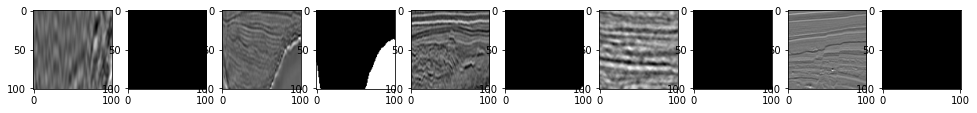

In [16]:
ids= ['1f1cc6b3a4','5b7c160d0d','6c40978ddf','7dfdf6eeb8','7e5a6e5013']
plt.figure(figsize=(20,10))
for j, img_name in enumerate(ids):
    q = j+1
    img = load_img('train/images/' + img_name + '.png')
    img_mask = load_img('train/masks/' + img_name + '.png')
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

In [23]:
train_note = pd.read_csv('train.csv')
test_note = pd.read_csv('train.csv')

In [24]:
train_note.head()

,id,rle_mask
0,2c45b152f1,99 3 197 6 295 9 395 10 494 12 594 13 694 14 7...
1,3cb59a4fdc,1 5656
2,e185ab5dc1,4647 2 4748 10 4849 18 4950 25 5051 29 5152 34...
3,c78c89577c,101 1
4,6306dd3a8e,1 30 102 29 203 29 304 28 405 27 506 27 607 26...


In [25]:
test_note.head()

,id,rle_mask
0,2c45b152f1,99 3 197 6 295 9 395 10 494 12 594 13 694 14 7...
1,3cb59a4fdc,1 5656
2,e185ab5dc1,4647 2 4748 10 4849 18 4950 25 5051 29 5152 34...
3,c78c89577c,101 1
4,6306dd3a8e,1 30 102 29 203 29 304 28 405 27 506 27 607 26...


In [26]:
train_ids = train_note['id']
test_ids = test_note['id']

In [27]:
train_ids

0       2c45b152f1
1       3cb59a4fdc
2       e185ab5dc1
3       c78c89577c
4       6306dd3a8e
           ...    
3995    429b289e07
3996    5d752d6d4a
3997    26527458de
3998    25fb3a895a
3999    f30c36bf6b
Name: id, Length: 4000, dtype: object

In [ ]:
# Read images and masks

In [29]:
# Get and resize train images and masks
im_height = 101
im_width = 101
im_chan = 1
X_train = np.zeros((len(train_ids), im_height, im_width, im_chan), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), im_height, im_width, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm_notebook(enumerate(train_ids), total=len(train_ids)):
    path = path_train
    img = load_img(path + '/images/' + id_)
    x = img_to_array(img)[:,:,1]
    x = resize(x, (128, 128, 1), mode='constant', preserve_range=True)
    X_train[n] = x
    mask = img_to_array(load_img(path + '/masks/' + id_))[:,:,1]
    Y_train[n] = resize(mask, (128, 128, 1), mode='constant', preserve_range=True)

print('Done!')

Getting and resizing train images and masks ... 


NameError: name 'tqdm_notebook' is not defined

In [5]:
#Load traing data X_train 
x_train_set_fpath = 'C:\\Users\\Grace-2019\\Documents\\SpringBoard_Data_Camp\\Capstone_project3_satellite_image\cvs_file\X_test_sat4.csv'
y_train_set_fpath = 'C:\\Users\\Grace-2019\\Documents\\SpringBoard_Data_Camp\\Capstone_project3_satellite_image\cvs_file\y_test_sat4.csv'
print ('Loading Training Data')
X_train = pd.read_csv(x_train_set_fpath,header=None)
print ('Loaded 28 x 28 x 4 images')


#Load label data Y-train.
Y_train = pd.read_csv(y_train_set_fpath,header=None)
print ('Loaded labels')

Loading Training Data


FileNotFoundError: [Errno 2] File C:\Users\Grace-2019\Documents\SpringBoard_Data_Camp\Capstone_project3_satellite_image\cvs_file\X_test_sat4.csv does not exist: 'C:\\Users\\Grace-2019\\Documents\\SpringBoard_Data_Camp\\Capstone_project3_satellite_image\\cvs_file\\X_test_sat4.csv'

In [ ]:
#Transform pandas dataframe into numpy array
#X_train = X_train.as_matrix()
#Y_train = Y_train.as_matrix()
#print ('We have',X_train.shape[0],'examples and each example is a list of',X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')

In [ ]:
X_train.head()

In [ ]:
X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img.shape)

In [ ]:
#Let's take a look at one image. Keep in mind the channels are R,G,B, and I(Infrared)
ix = 5#Type a number between 0 and 99,999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [ ]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

In [ ]:
X_train = X_train/255

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.01)

In [ ]:
preds = model.predict(X_train[-1000:], verbose=1)

In [ ]:
ix = 8 #Type a number between 0 and 999 inclusive
imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype(float)*255) #Only seeing the RGB channels
plt.show()
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')